# IMAGE CLASSIFICATION
## Top Secret Rosies & HP Challenge 2023
### By Anna Gracia Colmenarejo


In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

##### This function reads all the images in the folder. These images are separated by training images and test images. The training images will be used to train the classification algorithm and the test images will be used to test the algorithm and classify them. Finally, for the training and test data structures, we will save each photo with its respective class.

In [3]:
def load_images(path, clases):
    Xtr = []
    Ytr = []
    Xte = []
    Yte = []
    for i in clases:
        tr = path+i+'/train/'
        ts = path+i+'/test/'
        for img in os.listdir(tr):
            img = cv2.imread(os.path.join(tr, img))
            img_resized = cv2.resize(img,(200,400))
            Xtr.append(img_resized)
            Ytr.append(clases.index(i))
        for img in os.listdir(ts):
            img = cv2.imread(os.path.join(ts, img))
            img_resized = cv2.resize(img,(200,400))
            Xte.append(img_resized)
            Yte.append(clases.index(i))
    # Convert list to numpy array format
    Xtr = np.array(Xtr)
    Ytr = np.array(Ytr)
    Xte = np.array(Xte)
    Yte = np.array(Yte)

    return Xtr, Ytr, Xte, Yte

In [4]:
def knn_algorithm(k, x_train, y_train, x_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test) 
    print("Prediction complete")
    print('The accuracy of classifier on test data: {:.2f}'.format(knn.score(x_test, y_test)*100))
    return y_pred

In [5]:
def SGD_algorithm(x_train, y_train, x_test, y_test):
    clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Prediction complete")
    print('The accuracy of classifier on test data: {:.2f}'.format(clf.score(x_test, y_test)*100))
    return y_pred

##### We load the training and test images and their clases using our function load_images(images_dir,clases).

In [6]:
images_dir = 'Images/'
clases = ['Documents','Plans','Tickets']
x_train, y_train, x_test, y_test = load_images(images_dir, clases)

##### Reshape the image data into rows.

In [7]:
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

##### First we will be using KNN algorithm

Prediction complete
The accuracy of classifier on test data: 90.00
Test set classification report

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       181
           1       0.90      0.83      0.86       203
           2       0.80      0.88      0.84       156

    accuracy                           0.90       540
   macro avg       0.90      0.90      0.90       540
weighted avg       0.90      0.90      0.90       540



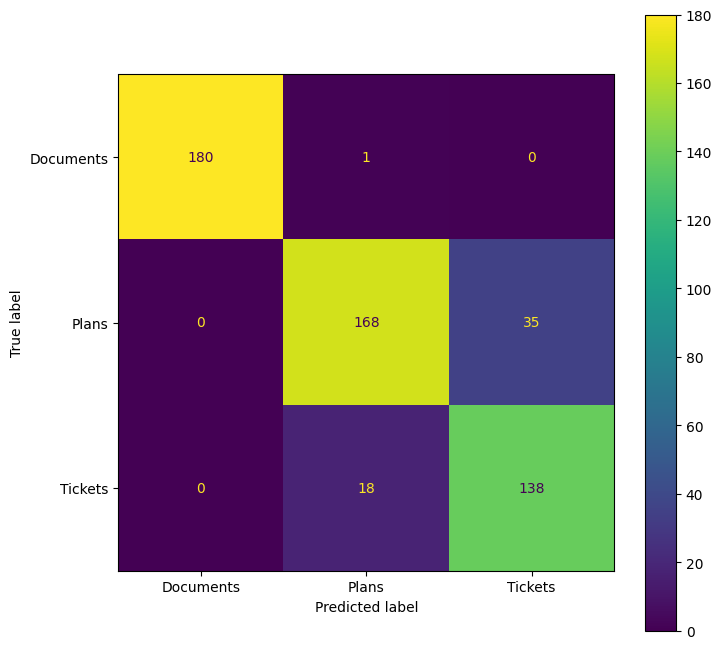

In [8]:
y_pred_knn = knn_algorithm(5, x_train, y_train, x_test, y_test)
print("Test set classification report\n")
print(classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test,y_pred_knn)
display = ConfusionMatrixDisplay(cm, display_labels=clases)

fig, ax = plt.subplots(figsize=(8,8))
display.plot(ax=ax, values_format='')

Prediction complete
The accuracy of classifier on test data: 94.44
Test set classification report

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       181
           1       0.93      0.94      0.93       203
           2       0.93      0.89      0.91       156

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540



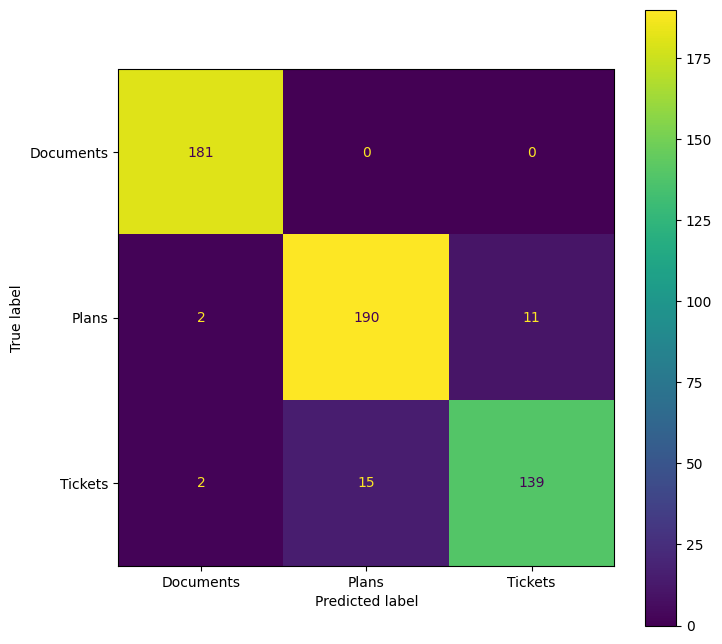

In [9]:
y_pred_sgd = SGD_algorithm(x_train, y_train, x_test, y_test)
print("Test set classification report\n")
print(classification_report(y_test, y_pred_sgd))

cm = confusion_matrix(y_test,y_pred_sgd)
display = ConfusionMatrixDisplay(cm, display_labels=clases)

fig, ax = plt.subplots(figsize=(8,8))
display.plot(ax=ax, values_format='')